# Comprobación FFT

$5\sin(2\pi*6 t) + \sin(2\pi t)$

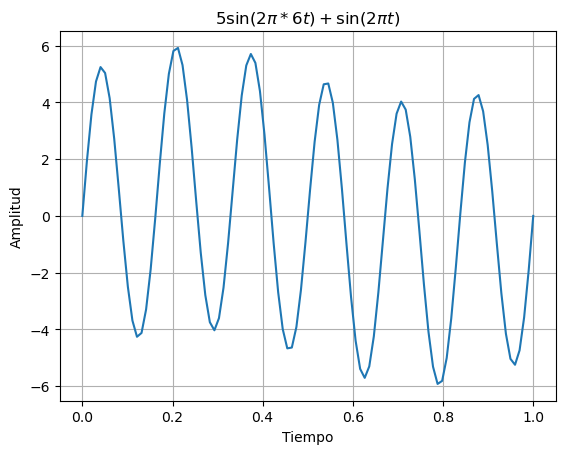

In [16]:
t = np.linspace(0, 1, 100) 
y = 5 * np.sin(2 * np.pi * 6 * t) + np.sin(2 * np.pi * t)
plt.plot(t, y)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('$5\sin(2\pi*6 t) + \sin(2\pi t)$')
plt.grid(True)
plt.show()

In [1]:
from scipy.fftpack import fft, fftfreq

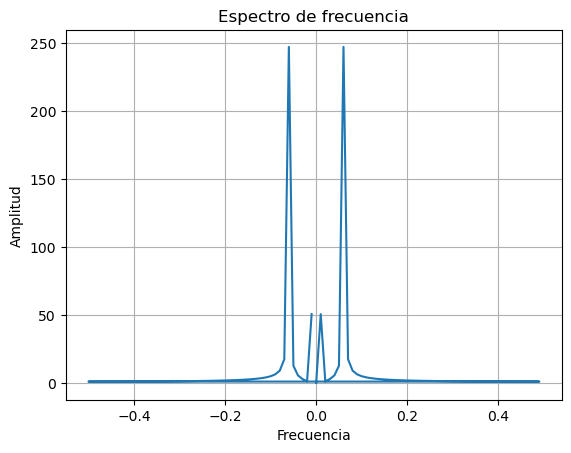

In [20]:
t = np.linspace(0, 1, 100)
y = 5 * np.sin(2 * np.pi * 6 * t) + np.sin(2 * np.pi * t)
fft_values = np.fft.fft(y)
frequencies = np.fft.fftfreq(len(y))
plt.plot(frequencies, np.abs(fft_values))
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.title('Espectro de frecuencia')
plt.grid(True)
plt.show()

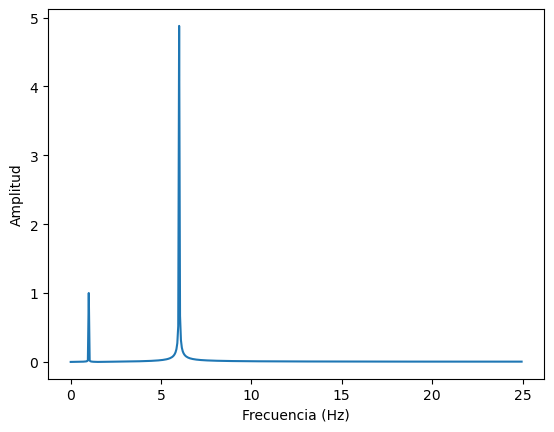

In [9]:
##esta es la que funciona jajaja
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de prueba
def my_function(t):
    return 5 * np.sin(2 * np.pi * 6 * t) + np.sin(2 * np.pi * t)

# Parámetros de la función
T = 1.0 / 50.0  # Período de muestreo
N = 1000  # Número de puntos de datos
t = np.linspace(0.0, N*T, N)  # Eje de tiempo

# Calcular la Transformada de Fourier
f = np.fft.fft(my_function(t))

# Obtener las amplitudes correspondientes
amplitudes = np.abs(f)[:N//2] * 2 / N  # Se toma la mitad y se normaliza

# Obtener las frecuencias correspondientes
frecuencias = np.fft.fftfreq(N, T)[:N//2]

# Graficar los resultados
plt.plot(frecuencias, amplitudes)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()



In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

def calcular_fft_ecg(archivo):
    # Cargar los datos del archivo .mat
    data = loadmat(archivo)
    ecg_signal = data['val'][0]  # Obtener la señal de ECG del archivo

    # Parámetros de la señal
    T = 1.0 / freq_value  # Período de muestreo
    print(T)
    N = len(ecg_signal)  # Número de puntos de datos
    t = np.linspace(0.0, N*T, N)  # Eje de tiempo

    # Calcular la Transformada de Fourier
    f = np.fft.fft(ecg_signal)

    # Obtener las amplitudes correspondientes
    amplitudes = np.abs(f)[:N//2] * 2 / N  # Se toma la mitad y se normaliza

    # Obtener las frecuencias correspondientes
    frecuencias = np.fft.fftfreq(N, T)[:N//2]

    return frecuencias, amplitudes

def graficar_fft_ecg(archivo):
    frecuencias, amplitudes = calcular_fft_ecg(archivo)

    plt.plot(frecuencias, amplitudes)
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.title('Transformada de Fourier del ECG')
    plt.grid(True)
    plt.show()

In [76]:
def calcular_fft_ecg(archivo):
    # Cargar los datos del archivo .mat
    x = loadmat(archivo)  # Obtener la señal de ECG del archivo
    ecg1 = (x['val'] - 0) / 2000

# Transponer los datos del ECG
    ecg = np.transpose(ecg1)

    # Parámetros de la señal
    T = 1.0 / 1000  # Período de muestreo
    print(T)
    N = len(ecg)  # Número de puntos de datos
    print(N)
    t = np.linspace(0.0, N*T, N)  # Eje de tiempo

    # Calcular la Transformada de Fourier
    f = np.fft.fft(ecg)

    # Obtener las amplitudes correspondientes
    amplitudes = np.abs(f)[:N//2] * 2 / N  # Se toma la mitad y se normaliza

    # Obtener las frecuencias correspondientes
    frecuencias = np.fft.fftfreq(N, T)[:N//2]

    return frecuencias, amplitudes

def graficar_fft_ecg(archivo):
    frecuencias, amplitudes = calcular_fft_ecg(archivo)

    plt.plot(frecuencias, amplitudes)
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.title('Transformada de Fourier del ECG')
    plt.grid(True)
    plt.show()

0.001
10000


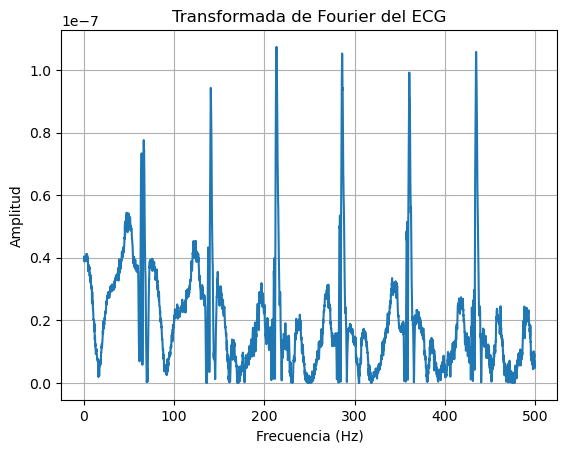

In [77]:
graficar_fft_ecg('s0010_rem.mat')

In [93]:
freq_value = float(freq_archivo('s0010_rem.info'))
signal_value = signal_archivo('s0010_rem.info')
gain_value = float(gain_archivo('s0010_rem.info'))
base_value = float(base_archivo('s0010_rem.info'))
unit_value = unit_archivo('s0010_rem.info')

In [94]:
calcular_fft_ecg('s0010_rem.mat')

TypeError: calcular_fft_ecg() missing 3 required positional arguments: 'gain', 'base', and 'frequency'

0.001


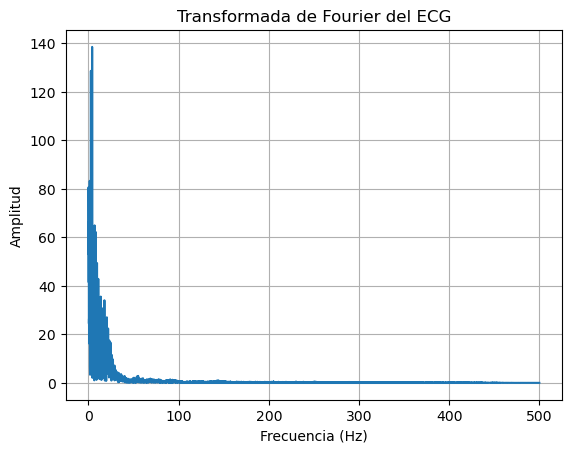

In [52]:
graficar_fft_ecg('s0010_rem.mat')

In [82]:
info = open('s0010_rem.info', 'r')
x= info.readlines()
info.close()
for i in x:
    print(i)

Source: record ptbdb/patient001/s0010_re

val has 1 row (signal) and 10000 columns (samples/signal)

Duration:     0:10

Sampling frequency: 1000 Hz  Sampling interval: 0.001 sec

Row	Signal	Gain	Base	Units

1	v5	2000	0	mV



To convert from raw units to the physical units shown

above, call the 'rdmat.m' function from the wfdb-matlab

toolbox: https://physionet.org/physiotools/matlab/wfdb-app-matlab/



In [83]:
freq_value = float(freq_archivo('16265m.info'))
signal_value = signal_archivo('16265m.info')
gain_value = float(gain_archivo('16265m.info'))
base_value = float(base_archivo('16265m.info'))
unit_value = unit_archivo('16265m.info')

In [38]:
info = open('16265m.info', 'r')
x= info.readlines()
info.close()
for i in x:
    print(i)

Source: record nsrdb/16265  Start: [08:04:00.000]

val has 1 row (signal) and 1280 columns (samples/signal)

Duration:     0:10

Sampling frequency: 128 Hz  Sampling interval: 0.0078125 sec

Row	Signal	Gain	Base	Units

1	ECG1	200	0	mV



To convert from raw units to the physical units shown

above, call the 'rdmat.m' function from the wfdb-matlab

toolbox: https://physionet.org/physiotools/matlab/wfdb-app-matlab/



In [84]:
calcular_fft_ecg('100m.mat')

TypeError: calcular_fft_ecg() missing 3 required positional arguments: 'gain', 'base', and 'frequency'

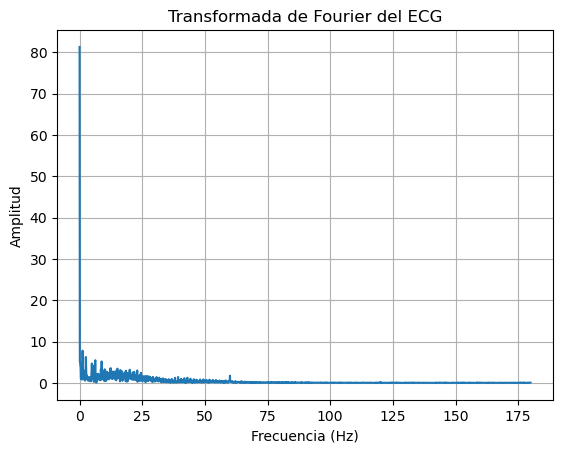

In [20]:
graficar_fft_ecg('100m.mat')

# 100.mat

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import wiener

In [24]:
info = open('100m.info', 'r')
x= info.readlines()
info.close()
for i in x:
    print(i)

Source: record mitdb/100

val has 1 row (signal) and 3600 columns (samples/signal)

Duration:     0:10

Sampling frequency: 360 Hz  Sampling interval: 0.002777777778 sec

Row	Signal	Gain	Base	Units

1	V5	200	0	mV



To convert from raw units to the physical units shown

above, call the 'rdmat.m' function from the wfdb-matlab

toolbox: https://physionet.org/physiotools/matlab/wfdb-app-matlab/



In [25]:
def freq_archivo(archivo):
    valores = {}
    with open(archivo, 'r') as f:
        lines = f.readlines()
    for line in lines:
        if line.startswith('Sampling frequency:'):
            freq = line.split(':')[1].strip().split()[0]
            valores['Sampling frequency'] = int(freq)
            break
    return valores['Sampling frequency']

In [26]:
def signal_archivo(archivo):
    valores = {}
    with open(archivo, 'r') as f:
        lines = f.readlines()
    for line in lines:
        if line.startswith('Row\tSignal\tGain\tBase\tUnits'):
            units_line = lines[lines.index(line) + 1]
            units = units_line.strip().split('\t')
            signal = units[1].strip('[]')
            valores['Signal'] = signal
            break  
    return valores['Signal']

In [27]:
def gain_archivo(archivo):
    valores = {}
    with open(archivo,'r') as f:
        lines = f.readlines()
    for line in lines:
        if line.startswith('Row\tSignal\tGain\tBase\tUnits'):
            units_line = lines[lines.index(line) + 1]  
            units = units_line.strip().split('\t')
            gain = units[2].strip('[]') 
            valores['Gain'] = gain  
            break
    return valores['Gain']

In [28]:
def base_archivo(archivo):
    valores = {}
    with open(archivo,'r') as f:
        lines = f.readlines()
    for line in lines:
        if line.startswith('Row\tSignal\tGain\tBase\tUnits'):
            units_line = lines[lines.index(line) + 1]  
            units = units_line.strip().split('\t')
            base = units[3].strip('[]') 
            valores['Base'] = base 
            break
    return valores['Base']

In [29]:
def unit_archivo(archivo):
    valores = {}
    with open(archivo,'r') as f:
        lines = f.readlines()
    for line in lines:
        if line.startswith('Row\tSignal\tGain\tBase\tUnits'):
            units_line = lines[lines.index(line) + 1]  
            units = units_line.strip().split('\t')
            unit = units[4].strip('[]') 
            valores['Units'] = unit
            break
    return valores['Units']

In [30]:
freq_value = float(freq_archivo('100m.info'))
signal_value = signal_archivo('100m.info')
gain_value = float(gain_archivo('100m.info'))
base_value = float(base_archivo('100m.info'))
unit_value = unit_archivo('100m.info')

In [31]:
x = loadmat('100m.mat')
print(len(x['val'][0]))
print((x['val'].astype(float) - base_value) / gain_value)

3600
[[-0.065 -0.065 -0.065 ... -0.295 -0.29  -0.285]]


# Función que grafica ecg

In [67]:
def ecg_graf(archivo, gain, base, frequency):
    x = loadmat(archivo)
    ecg1 = (x['val'] - base_value) / gain_value
    ecg = np.transpose(ecg1)
    time = 1 / freq_value
    t = np.linspace(0, np.size(ecg), np.size(ecg)) * time
    
    plt.plot(t, ecg)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud (mV)')
    plt.title('ECG')
    plt.grid(True)
    plt.show()

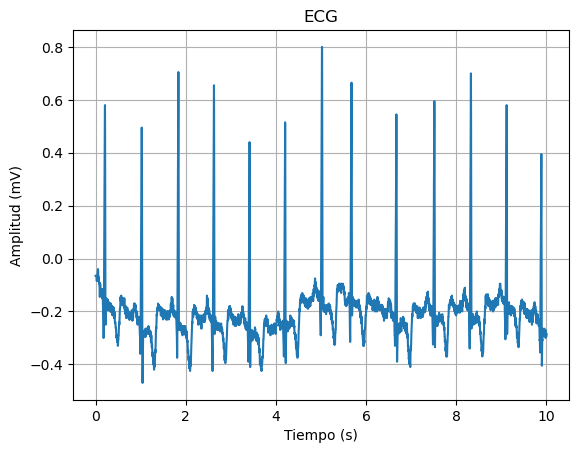

In [68]:
ecg_graf('100m.mat', gain_value, base_value, freq_value)

# Filtro Wiener '100m.mat'

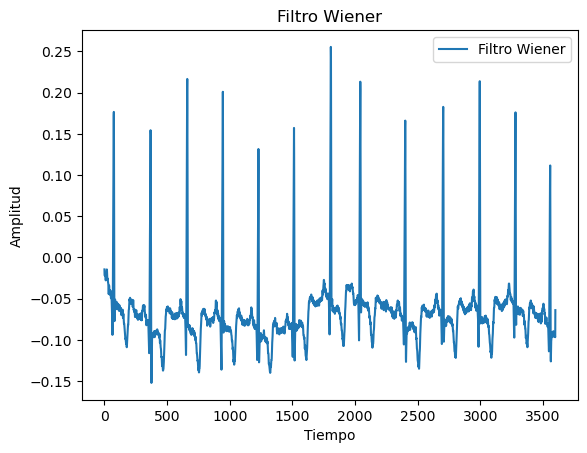

In [63]:
from scipy.signal import wiener
import matplotlib.pyplot as plt
##obtener la señal original
x = loadmat('100m.mat')
ecg1 = (x['val'] - base_value) / gain_value
ecg = np.transpose(ecg1)
##filtro Wiener
wiener_filtered = wiener(ecg, mysize=3, noise=5)
##graficar la escena original y  el filtro Wiener 
plt.figure()
##plt.plot(original_signal, label='Escena original')
plt.plot(wiener_filtered, label='Filtro Wiener')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtro Wiener')
plt.show()

# Filtro Butterworth

In [79]:
from scipy.io import loadmat
from scipy.signal import butter, filtfilt
import numpy as np
import matplotlib.pyplot as plt

def butterworth_filter(data, lowcut, highcut, fs, order=4):
    # Normalizar las frecuencias de corte
    nyquist_freq = 0.5 * fs
    low = lowcut / nyquist_freq
    high = highcut / nyquist_freq

    # Diseñar el filtro Butterworth
    b, a = butter(order, [low, high], btype='band')

    # Aplicar el filtro a los datos
    filtered_data = filtfilt(b, a, data, axis=0)

    return filtered_data

def filtro(archivo, gain, base, frequency, lowcut, highcut):
    # Cargar la señal ECG desde el archivo .mat
    x = loadmat(archivo)
    ecg1 = (x['val'] - base) / gain
    ecg = np.transpose(ecg1)
    
    # Crear el vector de tiempo para graficar
    t = np.arange(len(ecg)) / frequency
    
    # Aplicar el filtro Butterworth a la señal ECG
    filtered_ecg = butterworth_filter(ecg, lowcut, highcut, frequency)

    # Graficar solo la señal ECG filtrada
    plt.plot(t, filtered_ecg)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud (mV)')
    plt.title('ECG Filtrada (Butterworth)')
    plt.grid(True)
    plt.show()

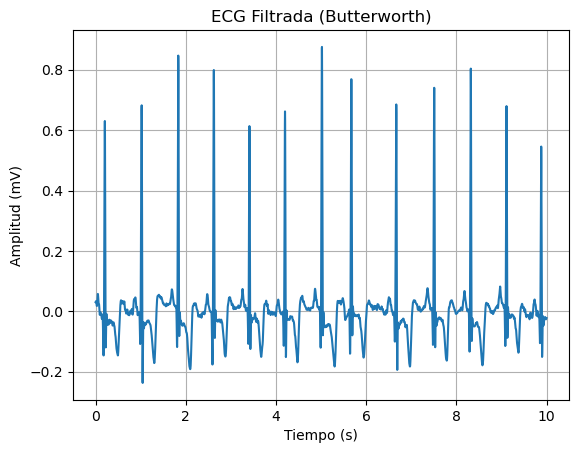

In [80]:
filtro('100m.mat',gain_value, base_value, freq_value, 0.5, 40)

In [85]:
import scipy.io
import scipy.signal as signal
import matplotlib.pyplot as plt

# Ruta del archivo .mat que contiene la señal de ECG
ruta_archivo = '100m.mat'

# Cargar la señal de ECG desde el archivo .mat
mat_data = scipy.io.loadmat('100m.mat')
ecg = mat_data[val].flatten()  # Aquí asumimos que la señal de ECG se llama 'ECG1'

# Parámetros de la señal
frecuencia_de_muestreo = 360  # Frecuencia de muestreo en Hz (según la descripción proporcionada)

# Frecuencias de corte del filtro
frecuencia_corte_inf = 0.5  # Frecuencia de corte inferior en Hz
frecuencia_corte_sup = 100  # Frecuencia de corte superior en Hz
orden = 4  # Orden del filtro Butterworth

# Calcular las frecuencias de corte normalizadas
frecuencia_corte_inf_norm = frecuencia_corte_inf / (0.5 * frecuencia_de_muestreo)
frecuencia_corte_sup_norm = frecuencia_corte_sup / (0.5 * frecuencia_de_muestreo)

# Diseñar el filtro Butterworth
b, a = signal.butter(orden, [frecuencia_corte_inf_norm, frecuencia_corte_sup_norm], btype='band')

# Aplicar el filtro al ECG
ecg_filtrado = signal.filtfilt(b, a, ecg)

# Graficar la señal original y filtrada
tiempo = range(len(ecg))  # Tiempo en muestras
tiempo_segundos = [t / frecuencia_de_muestreo for t in tiempo]  # Tiempo en segundos

plt.figure(figsize=(12, 6))
plt.plot(tiempo_segundos, ecg, label='Señal Original')
plt.plot(tiempo_segundos, ecg_filtrado, label='Señal Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'val' is not defined

# FFT '100m.mat'

In [69]:
def calcular_fft_ecg(archivo, gain, base, frequency):
    #x = loadmat(archivo)
    #ecg1 = (x['val'] - base_value) / gain_value
    #ecg = np.transpose(ecg1)
    #time = 1 / freq_value
    #t = np.linspace(0, np.size(ecg), np.size(ecg)) * time
    ecg = wiener_filtered
    fft_result = np.fft.fft(ecg)
    amplitudes = np.abs(fft_result)
    frecuencias = np.fft.fftfreq(len(ecg), d=1/frequency)[:len(ecg)//2]
    
    return frecuencias, amplitudes

In [70]:
calcular_fft_ecg('100m.mat', gain_value, base_value, freq_value)

(array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.797e+02, 1.798e+02,
        1.799e+02]),
 array([[0.01444444],
        [0.02166667],
        [0.02166667],
        ...,
        [0.09666667],
        [0.09666667],
        [0.06388889]]))

In [71]:
def graficar_fft_ecg(archivo, gain, base, frequency):
    frecuencias, amplitudes = calcular_fft_ecg(archivo, gain, base, frequency)
    
    amplitudes = amplitudes[:len(amplitudes)//2] / 2
    
    plt.plot(frecuencias, amplitudes)
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.title('Transformada de Fourier del ECG')
    plt.grid(True)
    plt.show()

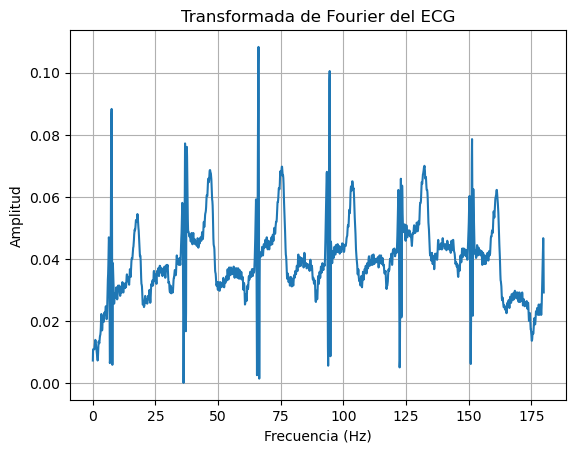

In [72]:
graficar_fft_ecg('100m.mat', gain_value, base_value, freq_value)

# Archivo 's0010_rem.mat'

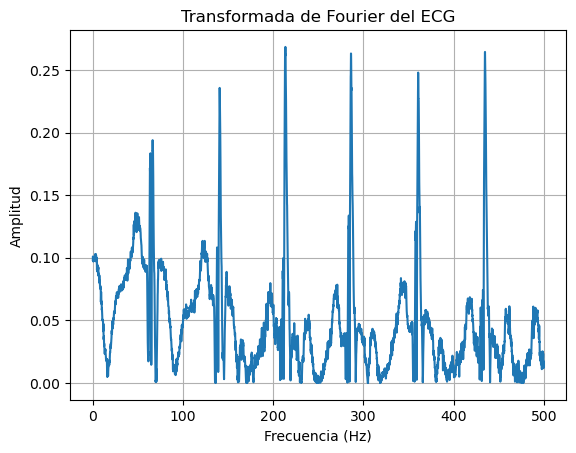

In [96]:
graficar_fft_ecg('s0010_rem.mat', gain_value, base_value, freq_value)

In [95]:
calcular_fft_ecg('s0010_rem.mat', gain_value, base_value, freq_value)

(array([0.000e+00, 1.000e-01, 2.000e-01, ..., 4.997e+02, 4.998e+02,
        4.999e+02]),
 array([[0.1965],
        [0.202 ],
        [0.2005],
        ...,
        [0.0505],
        [0.0575],
        [0.0565]]))

In [20]:
ecg_graf('100m.mat', gain_value, base_value, freq_value)

NameError: name 'ecg_graf' is not defined

In [1]:
import scipy.io

data = scipy.io.loadmat('100m.mat')

# Obtener la matriz de una sola fila y n columnas
matriz = data['val']

# Imprimir la forma de la matriz
print(matriz.shape)  # Resultado: (1, n)

(1, 3600)


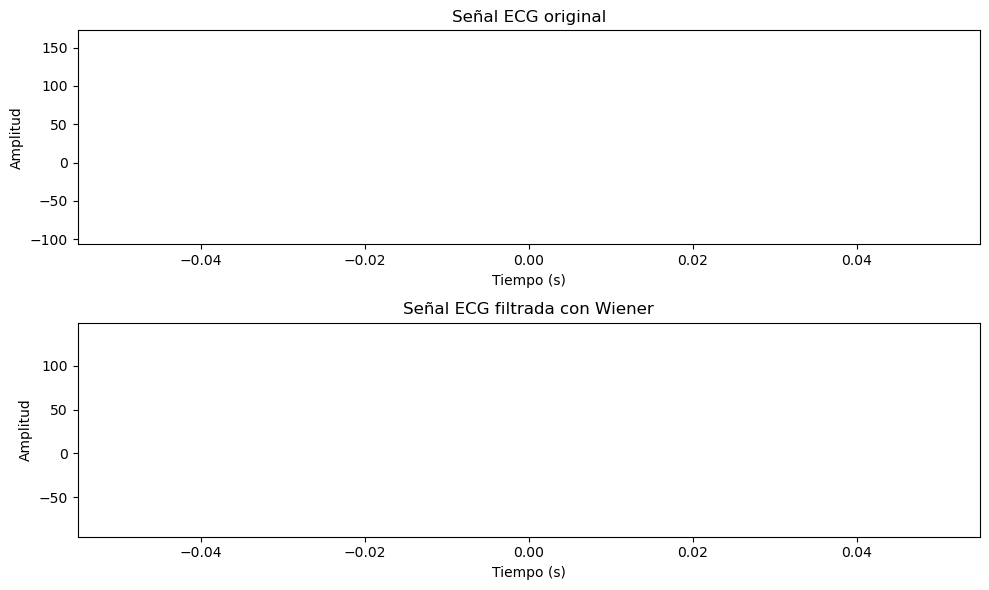

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import wiener

# Cargar la señal ECG desde el archivo .mat
data = loadmat('100m.mat')
ecg_signal = data['val']

# Configurar parámetros de la señal y el filtro
fs = 1000  # Frecuencia de muestreo (Hz)
window = 0.5  # Tamaño de la ventana para el cálculo del filtro Wiener

# Aplicar el filtro Wiener a la señal ECG
filtered_ecg = wiener(ecg_signal, mysize=int(window * fs), noise=0.5)

# Crear el vector de tiempo para graficar
t = np.arange(len(ecg_signal)) / fs

# Graficar la señal ECG original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, ecg_signal)
plt.title('Señal ECG original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(t, filtered_ecg)
plt.title('Señal ECG filtrada con Wiener')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()